<h2>Project Workbook<h2>

Author: Irene Berezin, Kaiyan Zhang, Niko Bauer, Jerrold Huang

In [1]:
# Installing required packages
install.packages("sandwich")
install.packages("coefplot")
install.packages("lmtest")

Installing package into 'C:/Users/Kaiyan Zhang/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'sandwich' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Kaiyan Zhang\AppData\Local\Temp\RtmpCWFAUo\downloaded_packages


Installing package into 'C:/Users/Kaiyan Zhang/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'coefplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Kaiyan Zhang\AppData\Local\Temp\RtmpCWFAUo\downloaded_packages


Installing package into 'C:/Users/Kaiyan Zhang/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'lmtest' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'lmtest'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Kaiyan Zhang\AppData\Local\R\win-library\4.4\00LOCK\lmtest\libs\x64\lmtest.dll to C:\Users\Kaiyan Zhang\AppData\Local\R\win-library\4.4\lmtest\libs\x64\lmtest.dll: Permission denied"
Warning message:
"restored 'lmtest'"



The downloaded binary packages are in
	C:\Users\Kaiyan Zhang\AppData\Local\Temp\RtmpCWFAUo\downloaded_packages


In [2]:
# Loading packages
library(geojsonio)
library(tidyverse)
library(ggplot2)
library(tidyr)
library(dplyr)
library("knitr")
library(broom)
library(stargazer)
library(units)
library(sf)
library(car)
library(sandwich)
library(coefplot)
library(lmtest)
library(VancouvR)

Warning message:
"package 'geojsonio' was built under R version 4.4.2"
Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson


Attaching package: 'geojsonio'


The following object is masked from 'package:base':

    pretty


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 


udunits database from

<h4>Linear Regression Check<h4>

In [3]:
# Read in the data
census_index_crime <- st_read("census_new_index_crime.geojson") |>
    mutate(across(c(immigrant_prop, education_prop, mean_land_value,income), as.double))|>
    na.omit()|>
    glimpse()

Reading layer `census_new_index_crime' from data source 
  `C:\Users\Kaiyan Zhang\Desktop\econ326\census_new_index_crime.geojson' 
  using driver `GeoJSON'
Simple feature collection with 993 features and 18 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.2242 ymin: 49.19853 xmax: -123.0229 ymax: 49.31408
Geodetic CRS:  WGS 84


Warning message:
"There were 4 warnings in `stopifnot()`.
The first warning was:
ℹ In argument: `across(...)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3 remaining warnings."


Rows: 989
Columns: 19
$ name                 <chr> "59150307", "59150308", "59150309", "59150310", "…
$ households           <int> 254, 203, 269, 283, 181, 203, 402, 170, 333, 174,…
$ dwellings            <int> 273, 223, 299, 310, 199, 211, 418, 181, 356, 189,…
$ population           <int> 632, 501, 745, 536, 532, 562, 1088, 556, 959, 506…
$ population_density   <dbl> 2110.9, 4575.3, 6663.7, 4895.0, 6567.9, 6445.0, 6…
$ region               <chr> "Vancouver", "Vancouver", "Vancouver", "Vancouver…
$ area_sq_km           <dbl> 0.29926, 0.10956, 0.11190, 0.10940, 0.08094, 0.08…
$ age                  <int> 630, 500, 745, 540, 530, 560, 1085, 555, 960, 510…
$ income               <dbl> 0.90965, 0.93611, 0.84736, 0.45184, 0.82517, 0.74…
$ immigrant_prop       <dbl> 0.2610759, 0.2894212, 0.3557047, 0.2891791, 0.404…
$ education_prop       <dbl> 0.3085443, 0.2794411, 0.3154362, 0.1865672, 0.253…
$ school_index         <dbl> 1.967207, 2.127046, 2.283703, 3.196982, 2.388786,…
$ light_index     

Residuals visualization

In [4]:
fn_residuals <- function(data, dependent_vars, independent_var) {
  
residuals_list <- list() #empty accumulator list

# looping through each variable and calcualting residuals
  for (var in dependent_vars) {
   formula <- as.formula(paste(var, "~", independent_var)) # https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/formula
    model <- lm(formula, data = data)
    residuals_list[[var]] <- resid(model) # extracting residuals and assigning to empty list
  }
  
  residuals_df <- as.data.frame(residuals_list)
  colnames(residuals_df) <- paste0("residual_", dependent_vars)

residuals_df <- cbind(residuals_df, data[dependent_vars]) |>
select(!geometry)

 return(residuals_df)}

Warning message:
"There was 1 warning in `mutate()`.
ℹ In argument: `model = list(lm(residual_value ~ x_value, data = cur_data()))`.
ℹ In group 1: `residual_type = "residual_bus_index"`.
Caused by warning:
! `cur_data()` was deprecated in dplyr 1.1.0.
ℹ Please use `pick()` instead."
Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


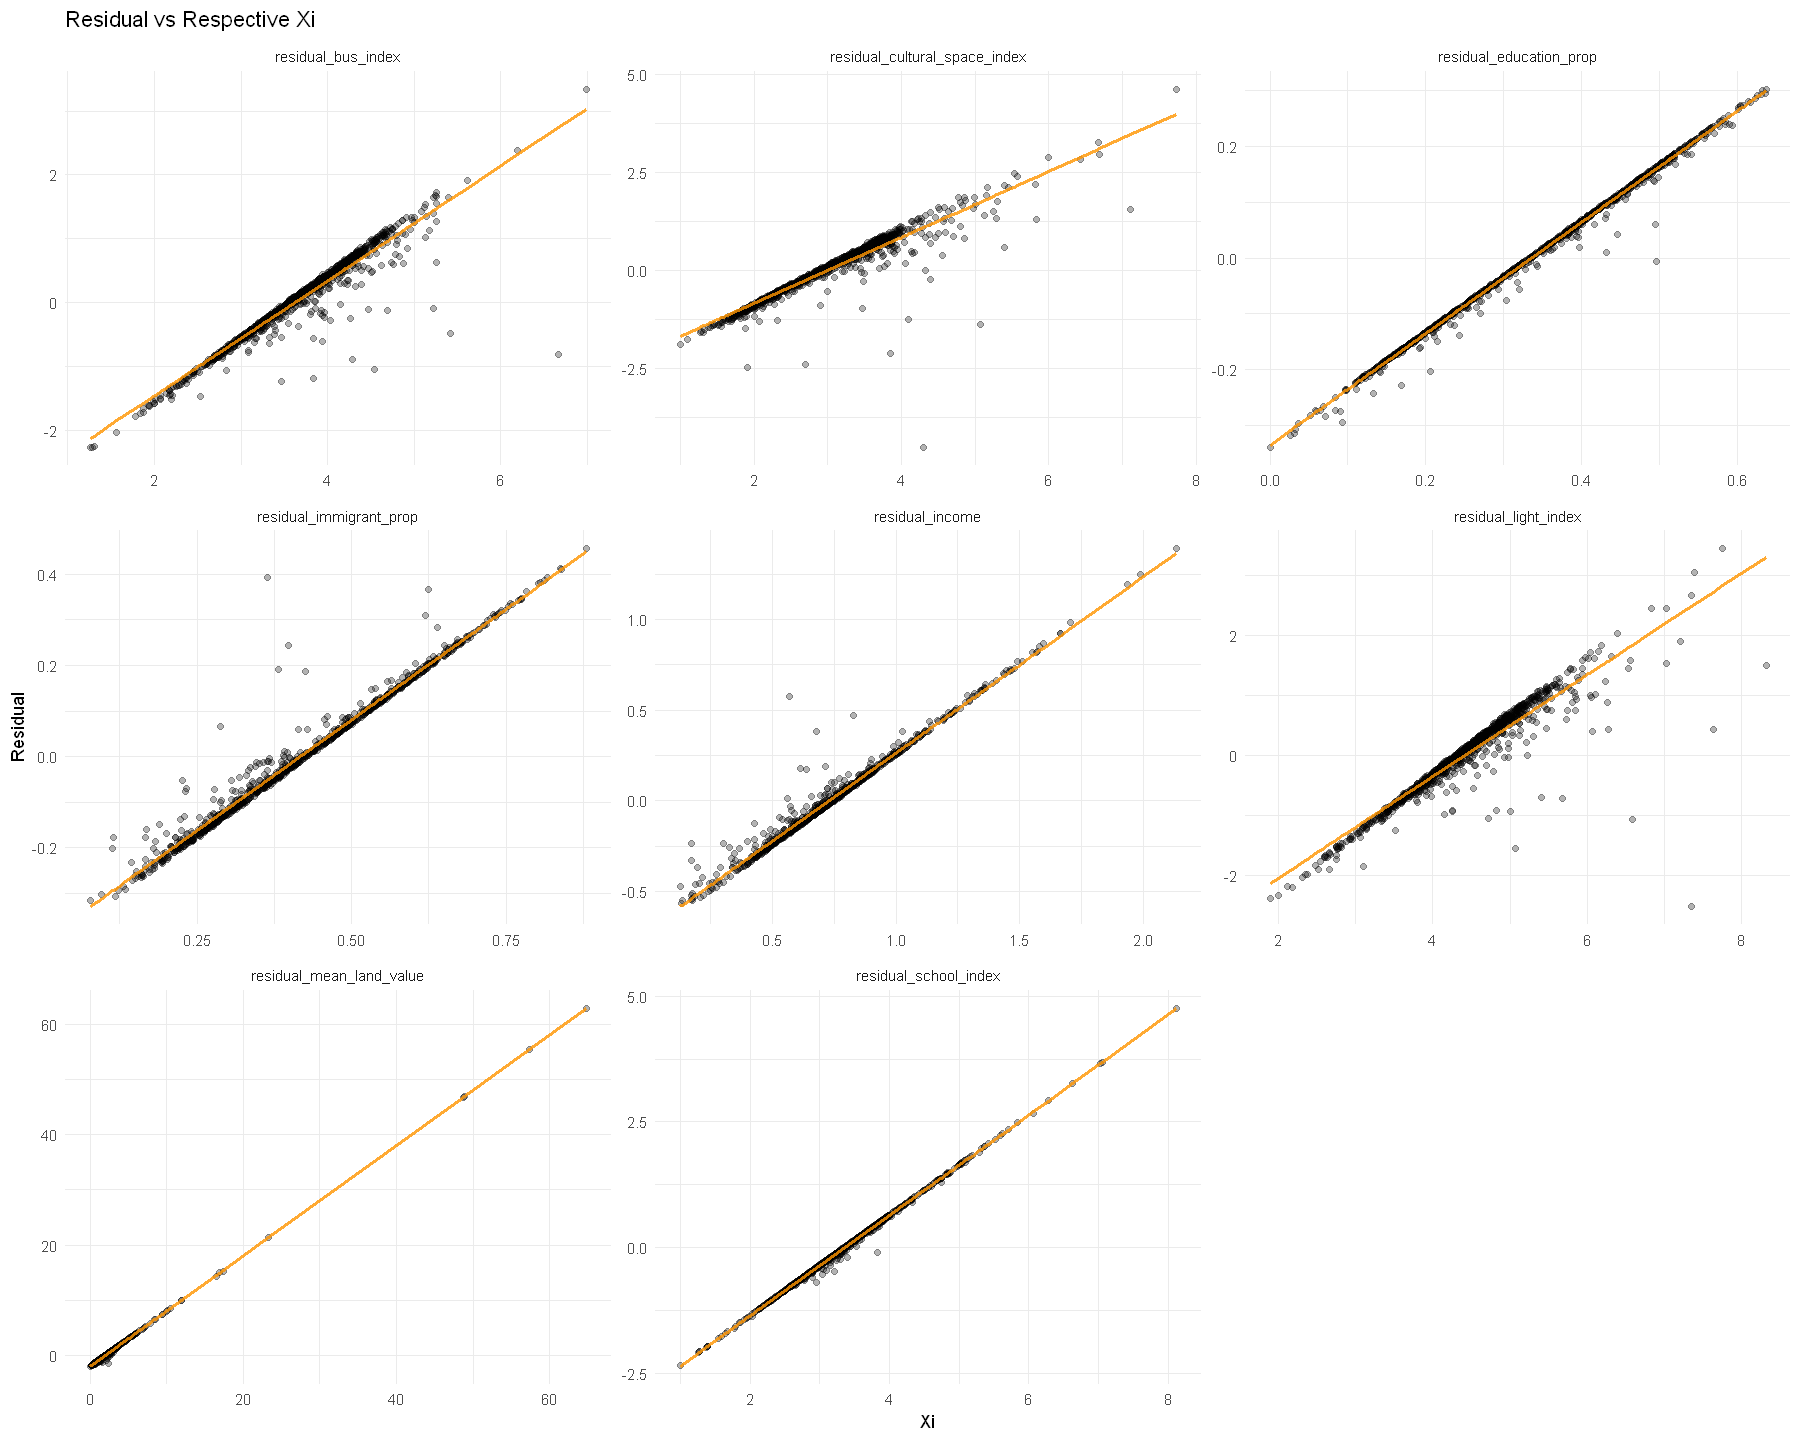

In [5]:
dependent_vars <- c('mean_land_value','school_index', 'light_index', 'bus_index', 'cultural_space_index', 'income', 'immigrant_prop', 'education_prop')
residuals_df <- fn_residuals(census_index_crime, dependent_vars, "crime_rate")

residuals_long <- residuals_df |>
  pivot_longer(
    cols = starts_with("residual_"), names_to = "residual_type", values_to = "residual_value") |>
  mutate(x_value = case_when(
    residual_type == "residual_mean_land_value" ~ mean_land_value,
    residual_type == "residual_school_index" ~ school_index,
    residual_type == "residual_light_index" ~ light_index,
    residual_type == "residual_bus_index" ~ bus_index,
    residual_type == "residual_cultural_space_index" ~ cultural_space_index,
    residual_type == "residual_income" ~ income,
    residual_type == "residual_immigrant_prop" ~ immigrant_prop,
    residual_type == "residual_education_prop" ~ education_prop
  ))

  options(repr.plot.width = 15, repr.plot.height = 12)

residuals_long  <- residuals_long |>
  group_by(residual_type) |>
  mutate(
    model = list(lm(residual_value ~ x_value, data = cur_data())),
    fitted_values = predict(model[[1]], newdata = data.frame(x_value = x_value))
  ) |>
  ungroup()

ggplot(residuals_long, aes(x = x_value, y = residual_value)) +
  geom_point(alpha=0.3) +
  geom_line(aes(y = fitted_values), color = "#ff9500", size=1, alpha=0.8) +  
  facet_wrap(~ residual_type, scales = "free") +
  labs(
    title = "Residual vs Respective Xi",
    x = "Xi",
    y = "Residual"
  ) +
  theme_minimal()

Simple regressions and visualizations

Warning message:
"Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(regressors)

  # Now:
  data %>% select(all_of(regressors))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>."
`geom_smooth()` using formula = 'y ~ x'


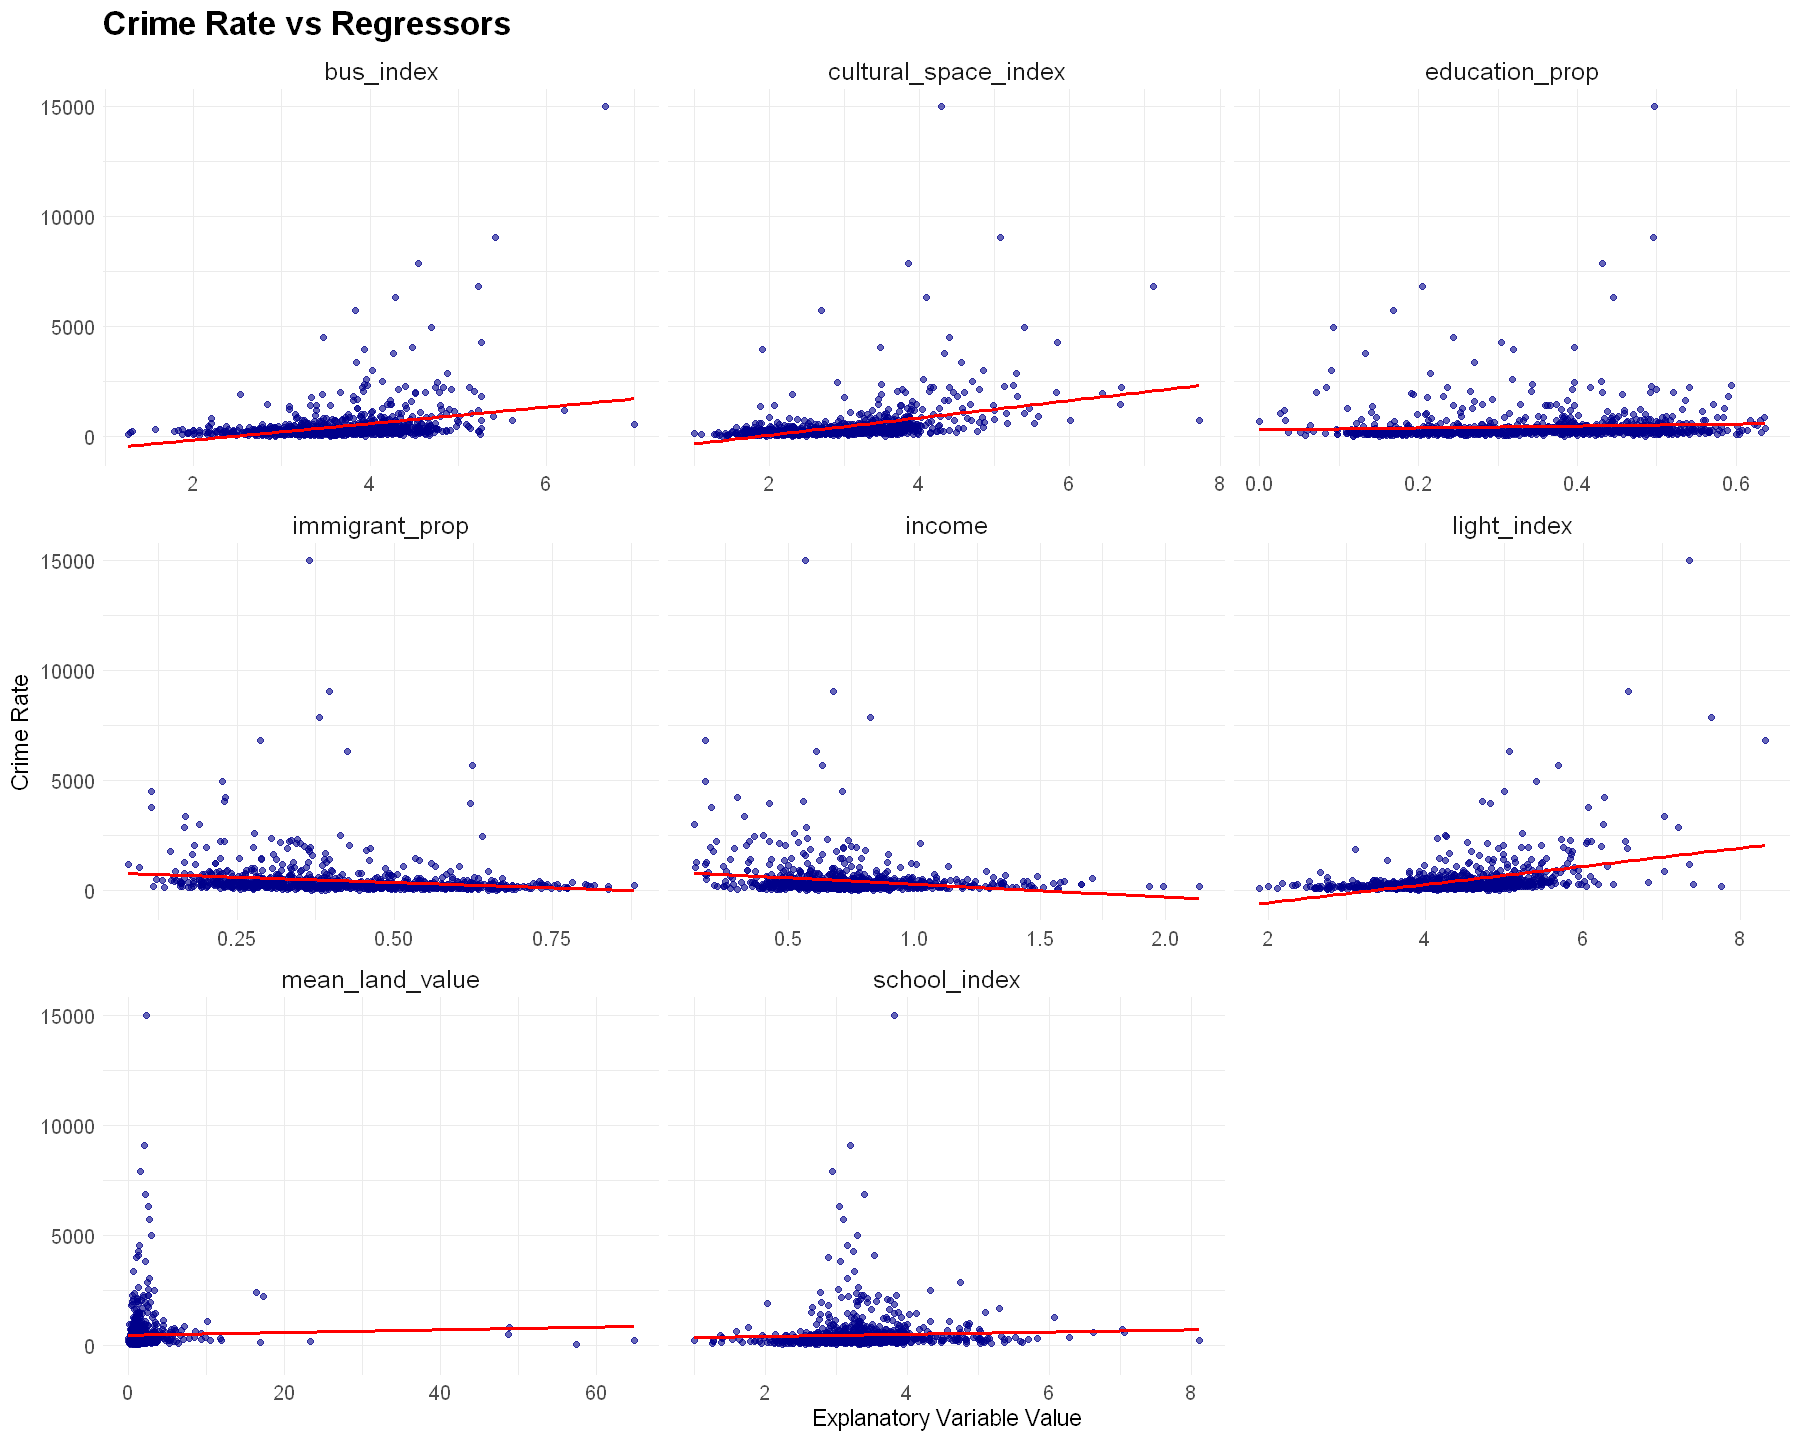

In [6]:
regressors <- c('light_index', 'mean_land_value','school_index', 'bus_index', 'cultural_space_index', 'income', 'immigrant_prop', 'education_prop')

long_data <- census_index_crime |>
  pivot_longer(cols = regressors,
               names_to = "regressor",
               values_to = "value")

variables_regression_scatter <- ggplot(long_data, aes(x = value, y = crime_rate)) +
  geom_point(color = "darkblue", alpha = 0.6) +
  facet_wrap(~ regressor, scales = "free_x") + 
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Crime Rate vs Regressors",
       x = "Explanatory Variable Value",
       y = "Crime Rate") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),
        strip.text = element_text(size = 15),  
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12))
        
variables_regression_scatter

In [7]:
# Carry out all the simple regressions
outcome <- "crime_rate"

simple_regressions <- map(regressors, ~ lm(as.formula(paste(outcome, "~", .x)), data = census_index_crime))

names(simple_regressions) <- regressors

stargazer(simple_regressions, type = "text",
          title = "Simple Regression Results",
          dep.var.labels = c("Crime Rate"))


Simple Regression Results
                                                                    Dependent variable:                                     
                               ---------------------------------------------------------------------------------------------
                                                                        Crime Rate                                          
                                    (1)         (2)        (3)        (4)         (5)         (6)         (7)        (8)    
----------------------------------------------------------------------------------------------------------------------------
light_index                     413.580***                                                                                  
                                 (30.733)                                                                                   
                                                                                                  

<h4> Shifting to log-log regression model <h4>

In [8]:
# Identify variables with zeros
zero_counts <- sapply(census_index_crime, function(x) {
  if (is.numeric(x)) {
    sum(x == 0, na.rm = TRUE)
  } else {
    NA
  }
})
print("Variables with zero counts:")
print(zero_counts)

[1] "Variables with zero counts:"
                name           households            dwellings 
                  NA                    0                    0 
          population   population_density               region 
                   0                    0                   NA 
          area_sq_km                  age               income 
                   0                    0                    0 
      immigrant_prop       education_prop         school_index 
                   0                    1                    0 
         light_index            bus_index cultural_space_index 
                   0                    0                    0 
         crime_count           crime_rate      mean_land_value 
                   0                    0                    0 
            geometry 
                  NA 


In [9]:
# log transformation for variables other than immigrant_prop and education_prop
census_index_crime_log <- census_index_crime |> 
  mutate(
    log_crime_rate = log(crime_rate),
    log_mean_land_value = log(mean_land_value),
    log_school_index = log(school_index),
    log_light_index = log(light_index),
    log_bus_index = log(bus_index),
    log_cultural_space_index = log(cultural_space_index),
    log_income = log(income),
    immigrant_prop = immigrant_prop,  
    education_prop = education_prop 
  )|>
  glimpse()


Rows: 989
Columns: 26
$ name                     <chr> "59150307", "59150308", "59150309", "59150310…
$ households               <int> 254, 203, 269, 283, 181, 203, 402, 170, 333, …
$ dwellings                <int> 273, 223, 299, 310, 199, 211, 418, 181, 356, …
$ population               <int> 632, 501, 745, 536, 532, 562, 1088, 556, 959,…
$ population_density       <dbl> 2110.9, 4575.3, 6663.7, 4895.0, 6567.9, 6445.…
$ region                   <chr> "Vancouver", "Vancouver", "Vancouver", "Vanco…
$ area_sq_km               <dbl> 0.29926, 0.10956, 0.11190, 0.10940, 0.08094, …
$ age                      <int> 630, 500, 745, 540, 530, 560, 1085, 555, 960,…
$ income                   <dbl> 0.90965, 0.93611, 0.84736, 0.45184, 0.82517, …
$ immigrant_prop           <dbl> 0.2610759, 0.2894212, 0.3557047, 0.2891791, 0…
$ education_prop           <dbl> 0.3085443, 0.2794411, 0.3154362, 0.1865672, 0…
$ school_index             <dbl> 1.967207, 2.127046, 2.283703, 3.196982, 2.388…
$ light_index     

In [10]:
# Conduct a regression on log(light index) only
reg_log_simple <- lm(log_crime_rate ~  log_light_index,
              data = census_index_crime_log)

white_test <- bptest(reg_log_simple, ~ fitted(reg_log_simple) + I(fitted(reg_log_simple)^2), data = census_index_crime_log)
print(white_test) 

robust_se_simple <- sqrt(diag(vcovHC(reg_log_simple, type = "HC1")))

stargazer(reg_log_simple, reg_log_simple, type = "text", 
        title = "Log-Log Regression Results with Robust Standard Errors", 
        dep.var.labels = c("Log Crime Rate"), 
        column.labels = c("SE", "RSE"),
        se = list(NULL, robust_se_simple),
        single.row=TRUE)


	studentized Breusch-Pagan test

data:  reg_log_simple
BP = 64.428, df = 2, p-value = 1.022e-14


Log-Log Regression Results with Robust Standard Errors
                                      Dependent variable:       
                               ---------------------------------
                                        Log Crime Rate          
                                      SE              RSE       
                                     (1)              (2)       
----------------------------------------------------------------
log_light_index                1.791*** (0.127) 1.791*** (0.154)
Constant                       3.051*** (0.187) 3.051*** (0.221)
----------------------------------------------------------------
Observations                         989              989       
R2                                  0.168            0.168      
Adjusted R2                         0.168            0.168      
Residual Std. Error (df = 987)      0.745            0.745      
F

We shift to using log(light count) instead for research topic concern.

In [11]:
light_data <- get_cov_data(dataset_id = 'street-lighting-poles')|>
    st_sf()

In [12]:
# Merge light counts back into the census dataset
census_index_crime_log <- st_sf(census_index_crime_log)|>
    st_make_valid()

light_data <- st_transform(light_data, st_crs(census_index_crime_log))

lights_with_census <- st_join(light_data, census_index_crime_log, join = st_within)

light_counts <- lights_with_census %>%
    st_drop_geometry() %>% 
    group_by(name) %>%     
    summarize(light_count = n(), .groups = "drop")

census_index_crime_log <- census_index_crime_log %>%
    left_join(light_counts, by = "name") %>%
    mutate(light_count = replace_na(light_count, 0))|>
    mutate(log_light_count = log(if_else(light_count == 0, 0.01, light_count))) # Fill missing values with 0

glimpse(census_index_crime_log)

Rows: 989
Columns: 28
$ name                     <chr> "59150307", "59150308", "59150309", "59150310…
$ households               <int> 254, 203, 269, 283, 181, 203, 402, 170, 333, …
$ dwellings                <int> 273, 223, 299, 310, 199, 211, 418, 181, 356, …
$ population               <int> 632, 501, 745, 536, 532, 562, 1088, 556, 959,…
$ population_density       <dbl> 2110.9, 4575.3, 6663.7, 4895.0, 6567.9, 6445.…
$ region                   <chr> "Vancouver", "Vancouver", "Vancouver", "Vanco…
$ area_sq_km               <dbl> 0.29926, 0.10956, 0.11190, 0.10940, 0.08094, …
$ age                      <int> 630, 500, 745, 540, 530, 560, 1085, 555, 960,…
$ income                   <dbl> 0.90965, 0.93611, 0.84736, 0.45184, 0.82517, …
$ immigrant_prop           <dbl> 0.2610759, 0.2894212, 0.3557047, 0.2891791, 0…
$ education_prop           <dbl> 0.3085443, 0.2794411, 0.3154362, 0.1865672, 0…
$ school_index             <dbl> 1.967207, 2.127046, 2.283703, 3.196982, 2.388…
$ light_index     

In [13]:
# Conduct a regression on log(light count) only
reg_log_simple2 <- lm(log_crime_rate ~  log_light_count,
              data = census_index_crime_log)

white_test <- bptest(reg_log_simple2, ~ fitted(reg_log_simple2) + I(fitted(reg_log_simple2)^2), data = census_index_crime_log)
print(white_test) 

robust_se_simple2 <- sqrt(diag(vcovHC(reg_log_simple2, type = "HC1")))

stargazer(reg_log_simple2, reg_log_simple2, type = "text", 
        title = "Log-Log Regression Results with Robust Standard Errors", 
        dep.var.labels = c("Log Crime Rate"), 
        column.labels = c("SE", "RSE"),
        se = list(NULL, robust_se_simple2),
        single.row=TRUE)


	studentized Breusch-Pagan test

data:  reg_log_simple2
BP = 54.414, df = 2, p-value = 1.528e-12


Log-Log Regression Results with Robust Standard Errors
                                      Dependent variable:       
                               ---------------------------------
                                        Log Crime Rate          
                                      SE              RSE       
                                     (1)              (2)       
----------------------------------------------------------------
log_light_count                0.345*** (0.038) 0.345*** (0.048)
Constant                       4.358*** (0.149) 4.358*** (0.181)
----------------------------------------------------------------
Observations                         989              989       
R2                                  0.076            0.076      
Adjusted R2                         0.075            0.075      
Residual Std. Error (df = 987)      0.785            0.785      


Adding control variables into the regression. We decided to also include variables capturing demographic factors, we decide to use mean age from census 2016 data.

In [14]:
# Load average age data
library(cancensus)
options(cancensus.api_key='CensusMapper_f228791d9506a7a747ece66db73b95be')
options(cancensus.cache_path = "/cache")

census_data_age <- get_census(dataset='CA16', regions=list(CSD="5915022"), vectors=c("v_CA16_379","v_CA16_388"), labels="detailed", geo_format="sf", level='DA')|>
    rename(mean_age = `v_CA16_379: Average age`, name = GeoUID)|>
    mutate(prop_working_age = `v_CA16_388: 15 to 64 years`/100)|>
    select(name, mean_age, prop_working_age)|>
    st_drop_geometry()|>
    glimpse()

Warning message:
"package 'cancensus' was built under R version 4.4.2"
Census data is currently stored temporarily.

 In order to speed up performance, reduce API quota usage, and reduce unnecessary network calls, please set up a persistent cache directory via `set_cancensus_cache_path('<local cache path>', install = TRUE)`.
 This will add your cache directory as environment varianble to your .Renviron to be used across sessions and projects.



Reading vectors data from local cache.

Reading geo data from local cache.



Rows: 993
Columns: 3
$ name             <chr> "59150307", "59150308", "59150309", "59150310", "5915…
$ mean_age         <dbl> 43.2, 42.2, 41.5, 40.2, 40.1, 41.0, 43.9, 37.6, 42.3,…
$ prop_working_age <dbl> 0.622, 0.670, 0.745, 0.815, 0.710, 0.743, 0.696, 0.73…


In [15]:
census_index_crime_log <- merge(census_index_crime_log, census_data_age, by = "name")|>
    mutate(log_mean_age = log(if_else(is.na(mean_age),0,mean_age)))|>
    glimpse()

Rows: 989
Columns: 31
$ name                     <chr> "59150307", "59150308", "59150309", "59150310…
$ households               <int> 254, 203, 269, 283, 181, 203, 402, 170, 333, …
$ dwellings                <int> 273, 223, 299, 310, 199, 211, 418, 181, 356, …
$ population               <int> 632, 501, 745, 536, 532, 562, 1088, 556, 959,…
$ population_density       <dbl> 2110.9, 4575.3, 6663.7, 4895.0, 6567.9, 6445.…
$ region                   <chr> "Vancouver", "Vancouver", "Vancouver", "Vanco…
$ area_sq_km               <dbl> 0.29926, 0.10956, 0.11190, 0.10940, 0.08094, …
$ age                      <int> 630, 500, 745, 540, 530, 560, 1085, 555, 960,…
$ income                   <dbl> 0.90965, 0.93611, 0.84736, 0.45184, 0.82517, …
$ immigrant_prop           <dbl> 0.2610759, 0.2894212, 0.3557047, 0.2891791, 0…
$ education_prop           <dbl> 0.3085443, 0.2794411, 0.3154362, 0.1865672, 0…
$ school_index             <dbl> 1.967207, 2.127046, 2.283703, 3.196982, 2.388…
$ light_index     

In [16]:
# Add control variables
reg_log1 <- lm(log_crime_rate ~ log_light_count+ log_mean_land_value + log_school_index + log_cultural_space_index
               + log_income + log_mean_age + immigrant_prop + education_prop, 
              data = census_index_crime_log)

white_test <- bptest(reg_log1, ~ fitted(reg_log1) + I(fitted(reg_log1)^2), data = census_index_crime_log)
print(white_test)  

robust_se1 <- sqrt(diag(vcovHC(reg_log1, type = "HC1")))

stargazer(reg_log1, reg_log1, type = "text", 
        title = "Log-Log Regression Results with Robust Standard Errors", 
        dep.var.labels = c("Log Crime Rate"), 
        column.labels = c("SE", "RSE"),
        se = list(NULL, robust_se1),
        single.row=TRUE)

vif(reg_log1)|>tidy()


	studentized Breusch-Pagan test

data:  reg_log1
BP = 7.2519, df = 2, p-value = 0.02662


Log-Log Regression Results with Robust Standard Errors
                                       Dependent variable:        
                               -----------------------------------
                                         Log Crime Rate           
                                      SE                RSE       
                                      (1)               (2)       
------------------------------------------------------------------
log_light_count                0.520*** (0.030)  0.520*** (0.037) 
log_mean_land_value            0.093*** (0.027)   0.093** (0.036) 
log_school_index               -0.531*** (0.105) -0.531*** (0.107)
log_cultural_space_index       1.485*** (0.100)  1.485*** (0.111) 
log_income                     -0.562*** (0.063) -0.562*** (0.067)
log_mean_age                   -0.470** (0.199)  -0.470** (0.224) 
immigrant_prop                 -0.511*** (0.152) -

Warning message in tidy.numeric(vif(reg_log1)):
"'tidy.numeric' is deprecated.
See help("Deprecated")"


names,x
<chr>,<dbl>
log_light_count,1.163506
log_mean_land_value,1.082033
log_school_index,1.602743
log_cultural_space_index,2.450723
log_income,1.536810
log_mean_age,1.112653
immigrant_prop,1.570767
education_prop,1.717184


We decide to add a dummy control variable, "containing insite" to capture this regional characteristic

In [17]:
# Add insite dummy
insite_df <- data.frame(
  id = 1:3,
  lon = c(-123.10129, -123.10555, -123.12074), 
  lat = c(49.28160, 49.28302, 49.27544)          
) # Source: Google Map

insite_sf <- st_as_sf(insite_df, coords = c("lon", "lat"), crs = 4326)

if (st_crs(census_index_crime_log) != st_crs(insite_sf)) {
  insite_sf <- st_transform(insite_sf, st_crs(census_index_crime_log))
}

valid_geometries <- st_is_valid(census_index_crime_log)

if (!all(valid_geometries)) {
  invalid_indices <- which(!valid_geometries)
  invalid_reasons <- st_is_valid(census_index_crime_log[invalid_indices, ], reason = TRUE)
  cat("Invalid geometries found. Reasons:\n")
  print(invalid_reasons)

  census_index_crime_log_st <- st_make_valid(census_index_crime_log_st)

  valid_geometries <- st_is_valid(census_index_crime_log_st)
  
  if (!all(valid_geometries)) {
    census_index_crime_log <- st_buffer(census_index_crime_log, dist = 0)
    valid_geometries <- st_is_valid(census_index_crime_log)
    
    if (!all(valid_geometries)) {
      stop("Some geometries are still invalid after attempting to fix them.")
    }
  }
}

contains_result <- st_contains(census_index_crime_log, insite_sf, sparse = FALSE)

census_index_crime_log$insite_dummy <- as.integer(apply(contains_result, 1, any))

head(census_index_crime_log$insite_dummy)

[1] 0 0 0 0 0 0

In [18]:
# Adding insite to our model
reg_log2 <- lm(log_crime_rate ~ log_light_count+ log_mean_land_value + log_school_index + log_cultural_space_index
               + log_income + log_mean_age + immigrant_prop + education_prop + insite_dummy, 
              data = census_index_crime_log)

white_test <- bptest(reg_log2, ~ fitted(reg_log2) + I(fitted(reg_log2)^2), data = census_index_crime_log)
print(white_test)  

robust_se2 <- sqrt(diag(vcovHC(reg_log2, type = "HC1")))

stargazer(reg_log2, reg_log2, type = "text", 
        title = "Log-Log Regression Results with Robust Standard Errors", 
        column.labels = c("SE","RSE"),
        dep.var.labels = c("Log Crime Rate"), 
        se = list(NULL, robust_se2),
        single.row=TRUE)

vif(reg_log2)|>tidy()


	studentized Breusch-Pagan test

data:  reg_log2
BP = 5.404, df = 2, p-value = 0.06707


Log-Log Regression Results with Robust Standard Errors
                                       Dependent variable:        
                               -----------------------------------
                                         Log Crime Rate           
                                      SE                RSE       
                                      (1)               (2)       
------------------------------------------------------------------
log_light_count                0.514*** (0.030)  0.514*** (0.037) 
log_mean_land_value            0.095*** (0.027)  0.095*** (0.036) 
log_school_index               -0.516*** (0.105) -0.516*** (0.107)
log_cultural_space_index       1.465*** (0.100)  1.465*** (0.111) 
log_income                     -0.557*** (0.063) -0.557*** (0.067)
log_mean_age                   -0.495** (0.198)  -0.495** (0.224) 
immigrant_prop                 -0.495*** (0.152) -0

Warning message in tidy.numeric(vif(reg_log2)):
"'tidy.numeric' is deprecated.
See help("Deprecated")"


names,x
<chr>,<dbl>
log_light_count,1.170004
log_mean_land_value,1.083316
log_school_index,1.608088
log_cultural_space_index,2.465895
log_income,1.537920
log_mean_age,1.115351
immigrant_prop,1.573405
education_prop,1.722196
insite_dummy,1.029244


Decided to include another dummy variable indicating the region is in Downtown Vancouver.

In [19]:
local_area_boundary <- get_cov_data("local-area-boundary")|>
    st_sf()

glimpse(local_area_boundary)

Rows: 22
Columns: 4
$ name         <chr> "Dunbar-Southlands", "Fairview", "Mount Pleasant", "Renfr…
$ geom         <chr> "{\"coordinates\": [[[-123.17016601562501, 49.24789047147…
$ geo_point_2d <chr> "49.23796190534427, -123.18954680338996", "49.26454048616…
$ geometry     <POLYGON [°]> POLYGON ((-123.1702 49.2478..., POLYGON ((-123.14…


In [20]:
# Create a downtown dummy in our dataset
local_area_boundary_valid <- st_make_valid(local_area_boundary)

selected_areas <- local_area_boundary_valid %>%
  filter(name %in% c("West End", "Downtown", "Strathcona"))

census_index_crime_log <- st_simplify(census_index_crime_log, dTolerance = 0.01)
selected_areas <- st_simplify(selected_areas, dTolerance = 0.01)

desired_crs <- st_crs(selected_areas)
census_index_crime_log <- st_transform(census_index_crime_log, crs = desired_crs)

census_index_crime_log$is_downtown <- as.integer(
  lengths(st_intersects(census_index_crime_log, selected_areas)) > 0
)

glimpse(census_index_crime_log)

Rows: 989
Columns: 33
$ name                     <chr> "59150307", "59150308", "59150309", "59150310…
$ households               <int> 254, 203, 269, 283, 181, 203, 402, 170, 333, …
$ dwellings                <int> 273, 223, 299, 310, 199, 211, 418, 181, 356, …
$ population               <int> 632, 501, 745, 536, 532, 562, 1088, 556, 959,…
$ population_density       <dbl> 2110.9, 4575.3, 6663.7, 4895.0, 6567.9, 6445.…
$ region                   <chr> "Vancouver", "Vancouver", "Vancouver", "Vanco…
$ area_sq_km               <dbl> 0.29926, 0.10956, 0.11190, 0.10940, 0.08094, …
$ age                      <int> 630, 500, 745, 540, 530, 560, 1085, 555, 960,…
$ income                   <dbl> 0.90965, 0.93611, 0.84736, 0.45184, 0.82517, …
$ immigrant_prop           <dbl> 0.2610759, 0.2894212, 0.3557047, 0.2891791, 0…
$ education_prop           <dbl> 0.3085443, 0.2794411, 0.3154362, 0.1865672, 0…
$ school_index             <dbl> 1.967207, 2.127046, 2.283703, 3.196982, 2.388…
$ light_index     

In [21]:
reg_log3 <- lm(log_crime_rate ~ log_light_count+ log_mean_land_value + log_school_index + log_cultural_space_index
               + log_income + log_mean_age + immigrant_prop + education_prop + is_downtown, 
              data = census_index_crime_log)

white_test <- bptest(reg_log3, ~ fitted(reg_log3) + I(fitted(reg_log3)^2), data = census_index_crime_log)
print(white_test)  

robust_se3 <- sqrt(diag(vcovHC(reg_log3, type = "HC1")))

stargazer(reg_log3, reg_log3, type = "text", 
        title = "Log-Log Regression Results with Robust Standard Errors", 
        dep.var.labels = c("Log Crime Rate"), 
        column.labels = c("SE", "RSE"),
        se = list(robust_se3, robust_se3),
        single.row=TRUE)

vif(reg_log3)|>tidy()


	studentized Breusch-Pagan test

data:  reg_log3
BP = 7.2022, df = 2, p-value = 0.02729


Log-Log Regression Results with Robust Standard Errors
                                       Dependent variable:        
                               -----------------------------------
                                         Log Crime Rate           
                                      SE                RSE       
                                      (1)               (2)       
------------------------------------------------------------------
log_light_count                0.527*** (0.037)  0.527*** (0.037) 
log_mean_land_value             0.093** (0.037)   0.093** (0.037) 
log_school_index               -0.340*** (0.103) -0.340*** (0.103)
log_cultural_space_index       1.215*** (0.110)  1.215*** (0.110) 
log_income                     -0.480*** (0.069) -0.480*** (0.069)
log_mean_age                   -0.535** (0.228)  -0.535** (0.228) 
immigrant_prop                 -0.632*** (0.151) -

Warning message in tidy.numeric(vif(reg_log3)):
"'tidy.numeric' is deprecated.
See help("Deprecated")"


names,x
<chr>,<dbl>
log_light_count,1.165912
log_mean_land_value,1.082058
log_school_index,1.820609
log_cultural_space_index,3.183301
log_income,1.644201
log_mean_age,1.117524
immigrant_prop,1.611855
education_prop,1.728957
is_downtown,1.749355


We try by creating interaction between our downtown dummy and log (light count)

In [22]:
reg_log_interaction <- lm(log_crime_rate ~ log_light_count+ log_mean_land_value + log_school_index + log_cultural_space_index
               + log_income + log_mean_age + immigrant_prop + education_prop + is_downtown:log_light_count, 
              data = census_index_crime_log)

white_test <- bptest(reg_log_interaction, ~ fitted(reg_log_interaction) + I(fitted(reg_log_interaction)^2), data = census_index_crime_log)
print(white_test)  

robust_se_interaction <- sqrt(diag(vcovHC(reg_log_interaction, type = "HC1")))

stargazer(reg_log_interaction, reg_log_interaction, type = "text", 
        title = "Log-Log Regression Results with Robust Standard Errors", 
        dep.var.labels = c("Log Crime Rate"), 
        column.labels = c("SE", "RSE"),
        se = list(NULL, robust_se_interaction),
        single.row=TRUE)

vif(reg_log_interaction)|>tidy()


	studentized Breusch-Pagan test

data:  reg_log_interaction
BP = 6.7251, df = 2, p-value = 0.03465


Log-Log Regression Results with Robust Standard Errors
                                       Dependent variable:        
                               -----------------------------------
                                         Log Crime Rate           
                                      SE                RSE       
                                      (1)               (2)       
------------------------------------------------------------------
log_light_count                0.486*** (0.030)  0.486*** (0.038) 
log_mean_land_value            0.101*** (0.027)  0.101*** (0.037) 
log_school_index               -0.322*** (0.110) -0.322*** (0.104)
log_cultural_space_index       1.189*** (0.112)  1.189*** (0.112) 
log_income                     -0.462*** (0.064) -0.462*** (0.071)
log_mean_age                   -0.527*** (0.196) -0.527** (0.226) 
immigrant_prop                 -0.614**

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif

Warning message in tidy.numeric(vif(reg_log_interaction)):
"'tidy.numeric' is deprecated.
See help("Deprecated")"


names,x
<chr>,<dbl>
log_light_count,1.212134
log_mean_land_value,1.085564
log_school_index,1.817760
log_cultural_space_index,3.178756
log_income,1.667094
log_mean_age,1.115782
immigrant_prop,1.595344
education_prop,1.731366
log_light_count:is_downtown,1.759214


We decide to move on with "Is Downtown" dummy, then we seek to add more control to improve our model. We begin by adding population density.

In [23]:
census_index_crime_log <- census_index_crime_log|>
    mutate(log_population_density = log(ifelse(population_density == 0, 0.01, population_density)))|>
    glimpse()

Rows: 989
Columns: 34
$ name                     <chr> "59150307", "59150308", "59150309", "59150310…
$ households               <int> 254, 203, 269, 283, 181, 203, 402, 170, 333, …
$ dwellings                <int> 273, 223, 299, 310, 199, 211, 418, 181, 356, …
$ population               <int> 632, 501, 745, 536, 532, 562, 1088, 556, 959,…
$ population_density       <dbl> 2110.9, 4575.3, 6663.7, 4895.0, 6567.9, 6445.…
$ region                   <chr> "Vancouver", "Vancouver", "Vancouver", "Vanco…
$ area_sq_km               <dbl> 0.29926, 0.10956, 0.11190, 0.10940, 0.08094, …
$ age                      <int> 630, 500, 745, 540, 530, 560, 1085, 555, 960,…
$ income                   <dbl> 0.90965, 0.93611, 0.84736, 0.45184, 0.82517, …
$ immigrant_prop           <dbl> 0.2610759, 0.2894212, 0.3557047, 0.2891791, 0…
$ education_prop           <dbl> 0.3085443, 0.2794411, 0.3154362, 0.1865672, 0…
$ school_index             <dbl> 1.967207, 2.127046, 2.283703, 3.196982, 2.388…
$ light_index     

In [24]:
reg_log4 <- lm(log_crime_rate ~ log_light_count+ log_mean_land_value + log_school_index + log_cultural_space_index
               + log_income  + log_mean_age + log_population_density + immigrant_prop + education_prop, 
              data = census_index_crime_log)

white_test <- bptest(reg_log4, ~ fitted(reg_log4) + I(fitted(reg_log4)^2), data = census_index_crime_log)
print(white_test)  

robust_se4 <- sqrt(diag(vcovHC(reg_log4, type = "HC1")))

stargazer(reg_log4, reg_log4, type = "text", 
        title = "Log-Log Regression Results with Robust Standard Errors", 
        dep.var.labels = c("Log Crime Rate"), 
        column.labels = c("SE", "RSE"),
        se = list(NULL, robust_se4),
        single.row=TRUE)

vif(reg_log4)|>tidy()


	studentized Breusch-Pagan test

data:  reg_log4
BP = 11.784, df = 2, p-value = 0.002761


Log-Log Regression Results with Robust Standard Errors
                                       Dependent variable:        
                               -----------------------------------
                                         Log Crime Rate           
                                      SE                RSE       
                                      (1)               (2)       
------------------------------------------------------------------
log_light_count                0.393*** (0.039)  0.393*** (0.044) 
log_mean_land_value              0.021 (0.031)     0.021 (0.043)  
log_school_index               -0.612*** (0.105) -0.612*** (0.108)
log_cultural_space_index       1.651*** (0.104)  1.651*** (0.113) 
log_income                     -0.681*** (0.066) -0.681*** (0.077)
log_mean_age                   -0.594*** (0.198) -0.594*** (0.223)
log_population_density         -0.202*** (0.040) 

Warning message in tidy.numeric(vif(reg_log4)):
"'tidy.numeric' is deprecated.
See help("Deprecated")"


names,x
<chr>,<dbl>
log_light_count,1.999435
log_mean_land_value,1.384732
log_school_index,1.641668
log_cultural_space_index,2.724590
log_income,1.760792
log_mean_age,1.130172
log_population_density,3.167249
immigrant_prop,1.631566
education_prop,1.794013


In [25]:
# Omit mean land value
reg_log5 <- lm(log_crime_rate ~ log_light_count + log_school_index + log_cultural_space_index
               + log_income  + log_mean_age + log_population_density + immigrant_prop + education_prop, 
              data = census_index_crime_log)

white_test <- bptest(reg_log5, ~ fitted(reg_log5) + I(fitted(reg_log5)^2), data = census_index_crime_log)
print(white_test)  

robust_se5 <- sqrt(diag(vcovHC(reg_log5, type = "HC1")))

stargazer(reg_log5, reg_log5, type = "text", 
        title = "Log-Log Regression Results with Robust Standard Errors", 
        dep.var.labels = c("Log Crime Rate"), 
        column.labels = c("SE", "RSE"),
        se = list(NULL, robust_se5),
        single.row=TRUE)

vif(reg_log5)|>tidy()


	studentized Breusch-Pagan test

data:  reg_log5
BP = 11.814, df = 2, p-value = 0.00272


Log-Log Regression Results with Robust Standard Errors
                                       Dependent variable:        
                               -----------------------------------
                                         Log Crime Rate           
                                      SE                RSE       
                                      (1)               (2)       
------------------------------------------------------------------
log_light_count                0.388*** (0.038)  0.388*** (0.042) 
log_school_index               -0.621*** (0.104) -0.621*** (0.110)
log_cultural_space_index       1.660*** (0.104)  1.660*** (0.115) 
log_income                     -0.687*** (0.066) -0.687*** (0.075)
log_mean_age                   -0.583*** (0.197) -0.583*** (0.220)
log_population_density         -0.215*** (0.036) -0.215*** (0.040)
immigrant_prop                 -0.355** (0.153)  -

Warning message in tidy.numeric(vif(reg_log5)):
"'tidy.numeric' is deprecated.
See help("Deprecated")"


names,x
<chr>,<dbl>
log_light_count,1.918484
log_school_index,1.620443
log_cultural_space_index,2.687266
log_income,1.723976
log_mean_age,1.123201
log_population_density,2.474896
immigrant_prop,1.622320
education_prop,1.719853


In [26]:
# Add is downtown
reg_log6 <- lm(log_crime_rate ~ log_light_count + log_school_index + log_cultural_space_index
               + log_income  + log_mean_age + log_population_density + log_mean_age + immigrant_prop + education_prop + is_downtown, 
              data = census_index_crime_log)

white_test <- bptest(reg_log6, ~ fitted(reg_log6) + I(fitted(reg_log6)^2), data = census_index_crime_log)
print(white_test)  

robust_se6 <- sqrt(diag(vcovHC(reg_log6, type = "HC1")))

stargazer(reg_log6, reg_log6, type = "text", 
        title = "Log-Log Regression Results with Robust Standard Errors", 
        dep.var.labels = c("Log Crime Rate"), 
        column.labels = c("SE", "RSE"),
        se = list(NULL, robust_se6),
        single.row=TRUE)

vif(reg_log6)|>tidy()


	studentized Breusch-Pagan test

data:  reg_log6
BP = 13.451, df = 2, p-value = 0.0012


Log-Log Regression Results with Robust Standard Errors
                                       Dependent variable:        
                               -----------------------------------
                                         Log Crime Rate           
                                      SE                RSE       
                                      (1)               (2)       
------------------------------------------------------------------
log_light_count                0.345*** (0.038)  0.345*** (0.041) 
log_school_index               -0.363*** (0.108) -0.363*** (0.104)
log_cultural_space_index       1.326*** (0.111)  1.326*** (0.110) 
log_income                     -0.613*** (0.065) -0.613*** (0.075)
log_mean_age                   -0.758*** (0.194) -0.758*** (0.226)
log_population_density         -0.293*** (0.036) -0.293*** (0.042)
immigrant_prop                 -0.475*** (0.150) -0

Warning message in tidy.numeric(vif(reg_log6)):
"'tidy.numeric' is deprecated.
See help("Deprecated")"


names,x
<chr>,<dbl>
log_light_count,1.967759
log_school_index,1.816749
log_cultural_space_index,3.241518
log_income,1.767524
log_mean_age,1.140728
log_population_density,2.713004
immigrant_prop,1.642368
education_prop,1.723479
is_downtown,1.917616


Since we've decided all the controls, we want to add interaction. 

In [27]:
# Add an interaction
reg_log7 <- lm(log_crime_rate ~ log_light_count + log_school_index + log_cultural_space_index
               + log_income  + log_mean_age + log_population_density + log_mean_age + immigrant_prop + education_prop
               + is_downtown + is_downtown:log_light_count, 
              data = census_index_crime_log)

white_test <- bptest(reg_log7, ~ fitted(reg_log7) + I(fitted(reg_log7)^2), data = census_index_crime_log)
print(white_test)  

robust_se7 <- sqrt(diag(vcovHC(reg_log7, type = "HC1")))

stargazer(reg_log7, reg_log7, type = "text", 
        title = "Log-Log Regression Results with Robust Standard Errors", 
        dep.var.labels = c("Log Crime Rate"), 
        column.labels = c("SE", "RSE"),
        se = list(NULL, robust_se7),
        single.row=TRUE)

vif(reg_log7)|>tidy()


	studentized Breusch-Pagan test

data:  reg_log7
BP = 13.194, df = 2, p-value = 0.001365


Log-Log Regression Results with Robust Standard Errors
                                       Dependent variable:        
                               -----------------------------------
                                         Log Crime Rate           
                                      SE                RSE       
                                      (1)               (2)       
------------------------------------------------------------------
log_light_count                0.286*** (0.045)  0.286*** (0.048) 
log_school_index               -0.354*** (0.108) -0.354*** (0.105)
log_cultural_space_index       1.310*** (0.111)  1.310*** (0.111) 
log_income                     -0.597*** (0.065) -0.597*** (0.077)
log_mean_age                   -0.735*** (0.193) -0.735*** (0.226)
log_population_density         -0.298*** (0.036) -0.298*** (0.043)
immigrant_prop                 -0.438*** (0.150) 

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif

Warning message in tidy.numeric(vif(reg_log7)):
"'tidy.numeric' is deprecated.
See help("Deprecated")"


names,x
<chr>,<dbl>
log_light_count,2.832238
log_school_index,1.818912
log_cultural_space_index,3.254000
log_income,1.788691
log_mean_age,1.143511
log_population_density,2.722393
immigrant_prop,1.659881
education_prop,1.723687
is_downtown,20.051920


Since the high VIF suggest it may not be a good idea to include both "is downtown" and the interaction.

In [28]:
# Add an interaction
reg_log8 <- lm(log_crime_rate ~ log_light_count + log_school_index + log_cultural_space_index
               + log_income  + log_mean_age + log_population_density + immigrant_prop + education_prop 
               + is_downtown:log_light_count, 
              data = census_index_crime_log)

white_test <- bptest(reg_log8, ~ fitted(reg_log8) + I(fitted(reg_log8)^2), data = census_index_crime_log)
print(white_test)  

robust_se8 <- sqrt(diag(vcovHC(reg_log8, type = "HC1")))

stargazer(reg_log8, reg_log8, type = "text", 
        title = "Log-Log Regression Results with Robust Standard Errors", 
        dep.var.labels = c("Log Crime Rate"), 
        column.labels = c("SE", "RSE"),
        se = list(NULL, robust_se8),
        single.row=TRUE)

vif(reg_log8)|>tidy()


	studentized Breusch-Pagan test

data:  reg_log8
BP = 13.194, df = 2, p-value = 0.001364


Log-Log Regression Results with Robust Standard Errors
                                       Dependent variable:        
                               -----------------------------------
                                         Log Crime Rate           
                                      SE                RSE       
                                      (1)               (2)       
------------------------------------------------------------------
log_light_count                0.286*** (0.039)  0.286*** (0.043) 
log_school_index               -0.355*** (0.107) -0.355*** (0.106)
log_cultural_space_index       1.310*** (0.111)  1.310*** (0.112) 
log_income                     -0.597*** (0.065) -0.597*** (0.076)
log_mean_age                   -0.735*** (0.193) -0.735*** (0.224)
log_population_density         -0.298*** (0.036) -0.298*** (0.043)
immigrant_prop                 -0.438*** (0.149) 

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif

Warning message in tidy.numeric(vif(reg_log8)):
"'tidy.numeric' is deprecated.
See help("Deprecated")"


names,x
<chr>,<dbl>
log_light_count,2.167112
log_school_index,1.810303
log_cultural_space_index,3.238628
log_income,1.783241
log_mean_age,1.135210
log_population_density,2.718941
immigrant_prop,1.631104
education_prop,1.723664
log_light_count:is_downtown,1.926401


We therefore decided our final regression model. But we still want to explore the inverse causality problem in our model and the regional fixed effect more.

In [29]:
# Creating an inverse causality model to shopw endogeneity
reg_log_inverse <- lm(log_light_count ~ log_crime_rate+ log_school_index + log_cultural_space_index
               + log_income + log_mean_age + log_population_density + immigrant_prop + education_prop, 
              data = census_index_crime_log)

white_test <- bptest(reg_log_inverse, ~ fitted(reg_log_inverse) + I(fitted(reg_log_inverse)^2), data = census_index_crime_log)
print(white_test)  

robust_se_inverse <- sqrt(diag(vcovHC(reg_log_inverse, type = "HC1")))

stargazer(reg_log_inverse, reg_log_inverse, type = "text", 
        title = "Log-Log Regression Results with Robust Standard Errors", 
        dep.var.labels = c("Log Crime Rate"), 
        column.labels = c("SE", "RSE"),
        se = list(NULL, robust_se_inverse),
        single.row=TRUE)

vif(reg_log_inverse)|>tidy()


	studentized Breusch-Pagan test

data:  reg_log_inverse
BP = 6.2975, df = 2, p-value = 0.04291


Log-Log Regression Results with Robust Standard Errors
                                       Dependent variable:        
                               -----------------------------------
                                         Log Crime Rate           
                                      SE                RSE       
                                      (1)               (2)       
------------------------------------------------------------------
log_crime_rate                 0.246*** (0.024)  0.246*** (0.030) 
log_school_index                 0.103 (0.085)     0.103 (0.080)  
log_cultural_space_index        0.158* (0.093)     0.158 (0.103)  
log_income                      0.135** (0.055)   0.135** (0.061) 
log_mean_age                    -0.029 (0.158)    -0.029 (0.178)  
log_population_density         -0.485*** (0.024) -0.485*** (0.028)
immigrant_prop                 0.754*** (0.

Warning message in tidy.numeric(vif(reg_log_inverse)):
"'tidy.numeric' is deprecated.
See help("Deprecated")"


names,x
<chr>,<dbl>
log_crime_rate,1.906631
log_school_index,1.676290
log_cultural_space_index,3.380295
log_income,1.904800
log_mean_age,1.133206
log_population_density,1.826325
immigrant_prop,1.567541
education_prop,1.754205


In [30]:
# Create a new downtown only dataset
downtown_areas <- local_area_boundary_valid %>%
  filter(name %in% c("West End", "Downtown", "Strathcona"))

selected_areas <- st_simplify(selected_areas, dTolerance = 0.01)

desired_crs <- st_crs(selected_areas)
census_index_crime_log <- st_transform(census_index_crime_log, crs = desired_crs)

census_index_crime_log_dt <- st_join(
  census_index_crime_log,
  downtown_areas,
  join = st_within,
  left = FALSE
)

glimpse(census_index_crime_log_dt)

Rows: 112
Columns: 37
$ name.x                   <chr> "59150751", "59150752", "59150753", "59150754…
$ households               <int> 349, 120, 116, 240, 413, 76, 254, 287, 191, 6…
$ dwellings                <int> 379, 142, 130, 267, 454, 109, 261, 299, 228, …
$ population               <int> 782, 300, 271, 456, 779, 203, 499, 577, 644, …
$ population_density       <dbl> 895.7, 7537.7, 9609.9, 10654.2, 15096.9, 8388…
$ region                   <chr> "Vancouver", "Vancouver", "Vancouver", "Vanco…
$ area_sq_km               <dbl> 0.87307, 0.03983, 0.02826, 0.04282, 0.05163, …
$ age                      <int> 785, 300, 275, 455, 780, 205, 495, 575, 645, …
$ income                   <dbl> 0.34624, 0.73216, 0.62080, 0.41600, 0.17740, …
$ immigrant_prop           <dbl> 0.3324808, 0.4000000, 0.1660517, 0.2850877, 0…
$ education_prop           <dbl> 0.2365729, 0.3833333, 0.3874539, 0.2960526, 0…
$ school_index             <dbl> 3.600271, 3.508716, 3.474039, 3.433914, 3.441…
$ light_index     

In [31]:
# Carry out a downtown only regression
reg_log_dt <- lm(log_crime_rate ~  log_light_count + log_school_index +  log_cultural_space_index
               + log_income  + log_mean_age + log_population_density + immigrant_prop + education_prop,
              data = census_index_crime_log_dt)

white_test <- bptest(reg_log_dt, ~ fitted(reg_log_dt) + I(fitted(reg_log_dt)^2), data = census_index_crime_log_dt)
print(white_test) 

robust_se_dt <- sqrt(diag(vcovHC(reg_log_dt, type = "HC1")))

stargazer(reg_log_dt, type = "text", 
        title = "Log-Log Regression Results with Robust Standard Errors", 
        dep.var.labels = c("Log Crime Rate"), 
        # se = list(robust_se_dt),
        single.row=TRUE)
vif(reg_log_dt)|>
    tidy()


	studentized Breusch-Pagan test

data:  reg_log_dt
BP = 0.98093, df = 2, p-value = 0.6123


Log-Log Regression Results with Robust Standard Errors
                             Dependent variable:    
                         ---------------------------
                               Log Crime Rate       
----------------------------------------------------
log_light_count               0.467*** (0.098)      
log_school_index              -1.664** (0.709)      
log_cultural_space_index      1.745*** (0.591)      
log_income                     -0.250 (0.244)       
log_mean_age                  -1.177** (0.554)      
log_population_density        -0.457*** (0.119)     
immigrant_prop                 -0.408 (0.615)       
education_prop                 -0.703 (0.870)       
Constant                      13.482*** (2.952)     
----------------------------------------------------
Observations                         112            
R2                                  0.553           
Adju

Warning message in tidy.numeric(vif(reg_log_dt)):
"'tidy.numeric' is deprecated.
See help("Deprecated")"


names,x
<chr>,<dbl>
log_light_count,1.790053
log_school_index,1.634793
log_cultural_space_index,1.674331
log_income,3.075196
log_mean_age,1.487660
log_population_density,1.813331
immigrant_prop,1.247169
education_prop,3.692439


Since we noticed the homoskedasticity of this model, we decide to explore more.

In [32]:
# Create a new dataset that exclude downtown
non_downtown_areas <- local_area_boundary_valid %>%
  filter(!name %in% c("West End", "Downtown", "Strathcona"))

census_index_crime_log_ut <- st_join(
  census_index_crime_log,
  non_downtown_areas,
  join = st_within,
  left = FALSE
)

glimpse(census_index_crime_log_ut)

Rows: 608
Columns: 37
$ name.x                   <chr> "59150309", "59150311", "59150329", "59150330…
$ households               <int> 269, 181, 333, 174, 275, 246, 185, 192, 213, …
$ dwellings                <int> 299, 199, 356, 189, 307, 264, 202, 208, 225, …
$ population               <int> 745, 532, 959, 506, 782, 683, 541, 507, 618, …
$ population_density       <dbl> 6663.7, 6567.9, 3109.6, 6462.3, 5068.0, 6103.…
$ region                   <chr> "Vancouver", "Vancouver", "Vancouver", "Vanco…
$ area_sq_km               <dbl> 0.11190, 0.08094, 0.30854, 0.07820, 0.15441, …
$ age                      <int> 745, 530, 960, 510, 785, 680, 545, 505, 620, …
$ income                   <dbl> 0.84736, 0.82517, 0.66688, 0.82176, 0.67840, …
$ immigrant_prop           <dbl> 0.3557047, 0.4041353, 0.5422315, 0.3557312, 0…
$ education_prop           <dbl> 0.3154362, 0.2537594, 0.1876955, 0.1581028, 0…
$ school_index             <dbl> 2.283703, 2.388786, 2.677803, 2.721358, 3.545…
$ light_index     

In [33]:
reg_log_ut <- lm(log_crime_rate ~  log_light_count + log_school_index +  log_cultural_space_index
               + log_income + log_mean_age + log_population_density + immigrant_prop + education_prop,
              data = census_index_crime_log_ut)

white_test <- bptest(reg_log_ut, ~ fitted(reg_log_ut) + I(fitted(reg_log_ut)^2), data = census_index_crime_log_ut)
print(white_test) 

robust_se_ut <- sqrt(diag(vcovHC(reg_log_ut, type = "HC1")))

stargazer(reg_log_ut, type = "text", 
        title = "Log-Log Regression Results with Robust Standard Errors", 
        dep.var.labels = c("Log Crime Rate"), 
        # se = list(robust_se_ut),
        single.row=TRUE)

vif(reg_log_ut)|>
        tidy()


	studentized Breusch-Pagan test

data:  reg_log_ut
BP = 4.7499, df = 2, p-value = 0.09302


Log-Log Regression Results with Robust Standard Errors
                             Dependent variable:    
                         ---------------------------
                               Log Crime Rate       
----------------------------------------------------
log_light_count               0.294*** (0.052)      
log_school_index               -0.219* (0.122)      
log_cultural_space_index      1.208*** (0.126)      
log_income                    -0.612*** (0.088)     
log_mean_age                  -1.060*** (0.251)     
log_population_density        -0.237*** (0.053)     
immigrant_prop                -0.527*** (0.179)     
education_prop                1.115*** (0.197)      
Constant                      9.138*** (1.166)      
----------------------------------------------------
Observations                         608            
R2                                  0.459           
Adju

Warning message in tidy.numeric(vif(reg_log_ut)):
"'tidy.numeric' is deprecated.
See help("Deprecated")"


names,x
<chr>,<dbl>
log_light_count,1.988655
log_school_index,1.929550
log_cultural_space_index,2.746134
log_income,1.693282
log_mean_age,1.092807
log_population_density,2.531558
immigrant_prop,1.936805
education_prop,1.723233


In [34]:
# Create a linear regression model with our controls, without log-log transformation
reg_linear <- lm(crime_rate ~  light_count + school_index +  cultural_space_index
               + income + mean_age + population_density + immigrant_prop + education_prop + is_downtown:light_count,
              data = census_index_crime_log)

white_test <- bptest(reg_linear, ~ fitted(reg_linear) + I(fitted(reg_linear)^2), data = census_index_crime_log)
print(white_test) 

robust_se_linear <- sqrt(diag(vcovHC(reg_linear, type = "HC1")))

stargazer(reg_linear, reg_linear, type = "text", 
        title = "Regression Results with Robust Standard Errors", 
        column.labels = c("SE", "RSE"),
        dep.var.labels = c("Crime Rate"), 
        se = list(NULL, robust_se_linear),
        single.row=TRUE)

vif(reg_linear)|>
        tidy()


	studentized Breusch-Pagan test

data:  reg_linear
BP = 113.54, df = 2, p-value < 2.2e-16


Regression Results with Robust Standard Errors
                                           Dependent variable:            
                               -------------------------------------------
                                               Crime Rate                 
                                        SE                    RSE         
                                        (1)                   (2)         
--------------------------------------------------------------------------
light_count                       1.663** (0.748)        1.663 (1.261)    
school_index                   -168.042*** (34.909)  -168.042*** (46.023) 
cultural_space_index            387.172*** (39.543)   387.172*** (83.304) 
income                         -459.504*** (108.403) -459.504*** (111.142)
mean_age                          -4.497 (5.039)        -4.497 (5.006)    
population_density               -0

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif

Warning message in tidy.numeric(vif(reg_linear)):
"'tidy.numeric' is deprecated.
See help("Deprecated")"


names,x
<chr>,<dbl>
light_count,3.930266
school_index,1.393091
cultural_space_index,2.430286
income,1.555232
mean_age,1.059817
population_density,1.788304
immigrant_prop,1.588736
education_prop,1.655654
light_count:is_downtown,3.882445


<h4>Result Summary<h4>

Comparing data before and after log-log transformation.

Warning message:
"Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(regressors_age_logless)

  # Now:
  data %>% select(all_of(regressors_age_logless))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>."
`geom_smooth()` using formula = 'y ~ x'


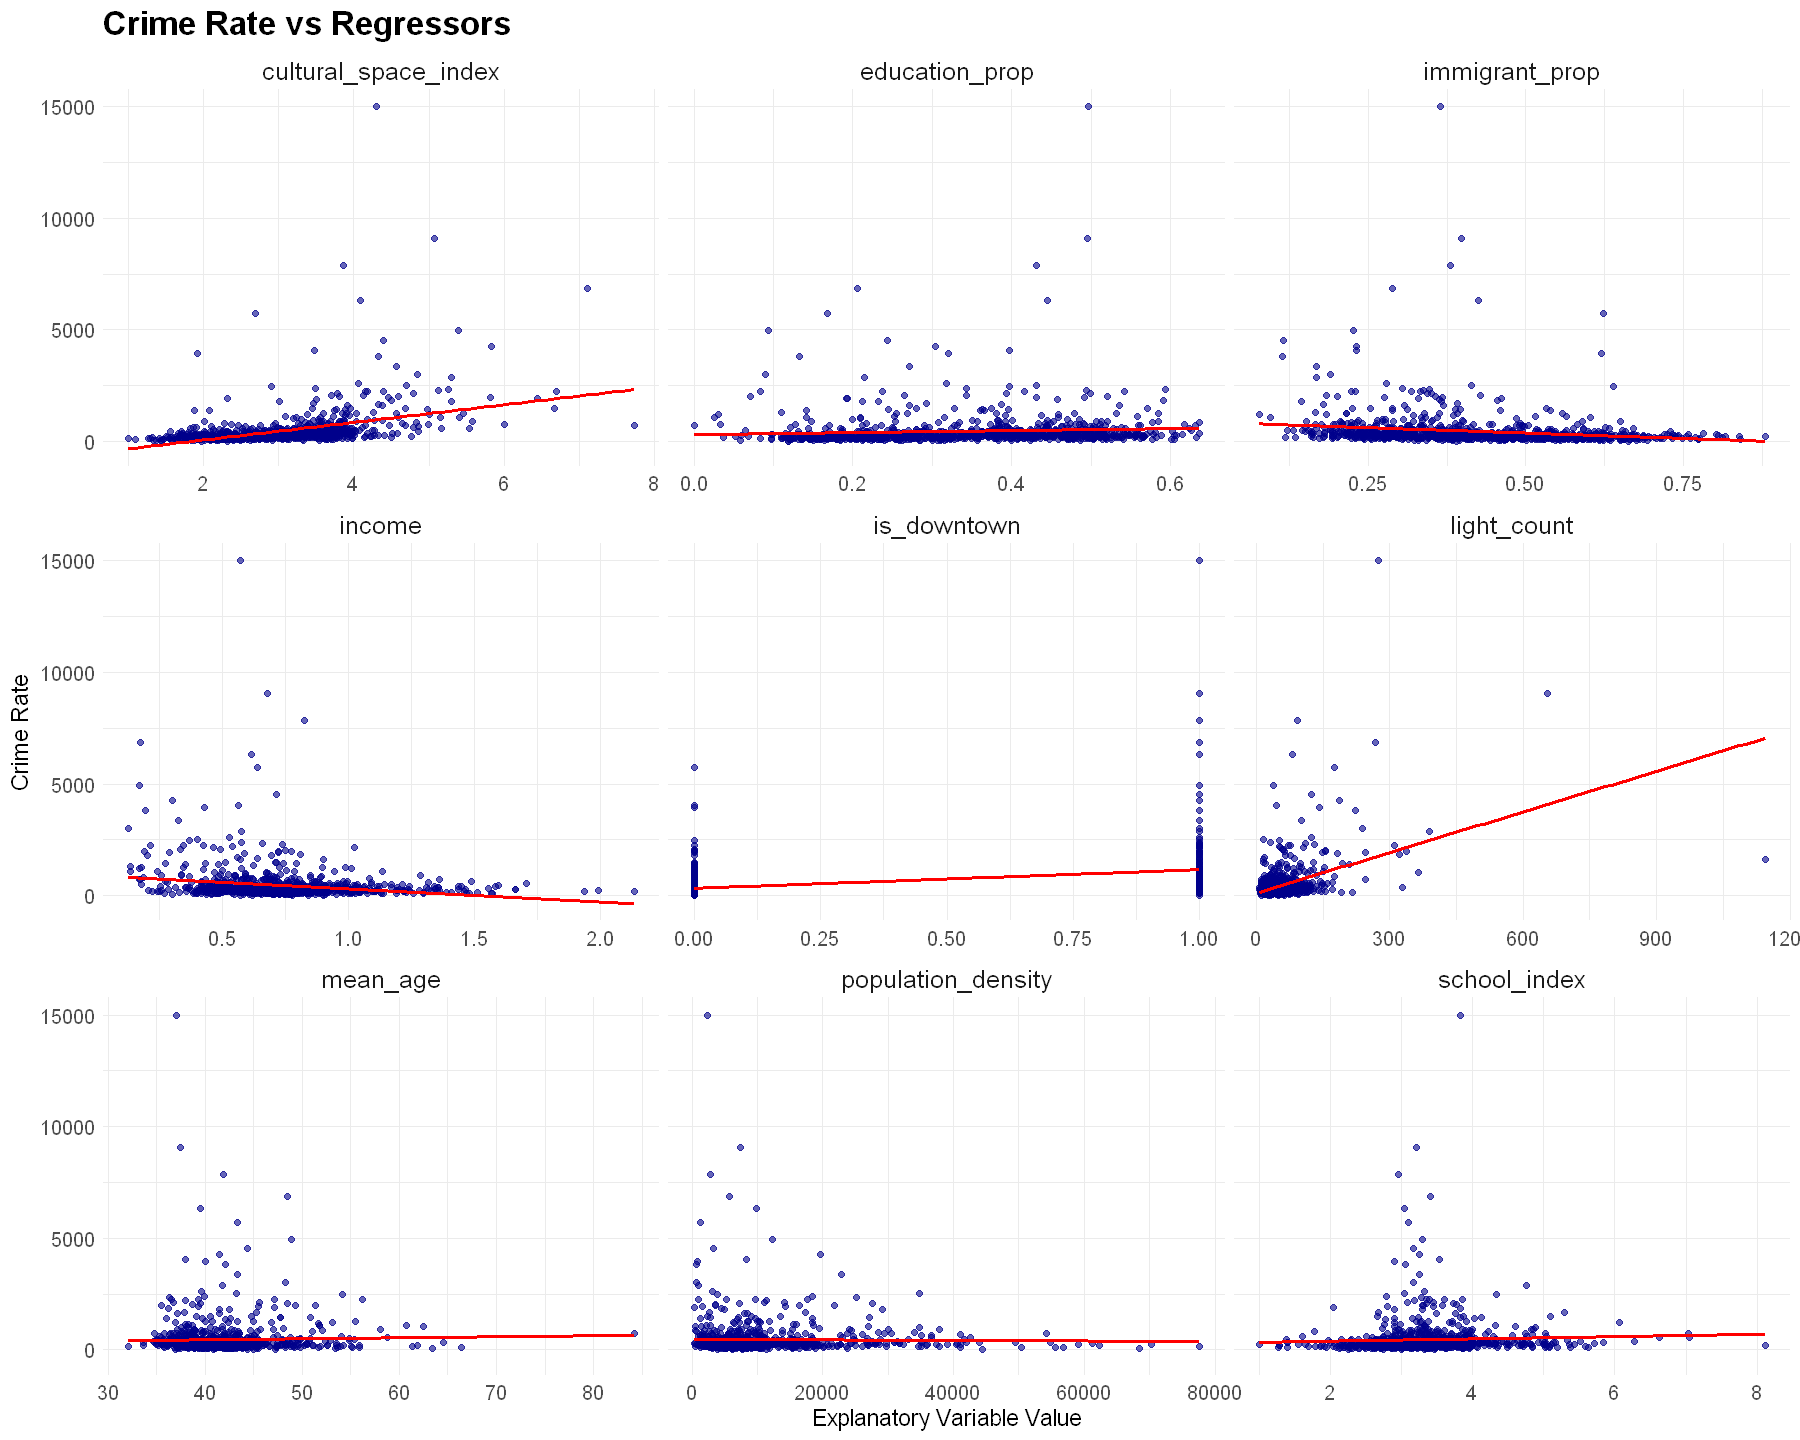

In [35]:
regressors_age_logless <- c('light_count', 'school_index', 'cultural_space_index', 
                'income', 'population_density', 'mean_age','immigrant_prop', 'education_prop','is_downtown')

long_data_age_logless <- census_index_crime_log |>
  pivot_longer(cols = regressors_age_logless,
               names_to = "regressor",
               values_to = "value")

variables_scatter_logless <- ggplot(long_data_age_logless, aes(x = value, y = crime_rate)) +
  geom_point(color = "darkblue", alpha = 0.6) +
  facet_wrap(~ regressor, scales = "free_x") + 
  labs(title = "Crime Rate vs Regressors",
       x = "Explanatory Variable Value",
       y = "Crime Rate") +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),
        strip.text = element_text(size = 15),  
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12))

variables_scatter_logless

Warning message:
"Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(regressors_log)

  # Now:
  data %>% select(all_of(regressors_log))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>."
`geom_smooth()` using formula = 'y ~ x'


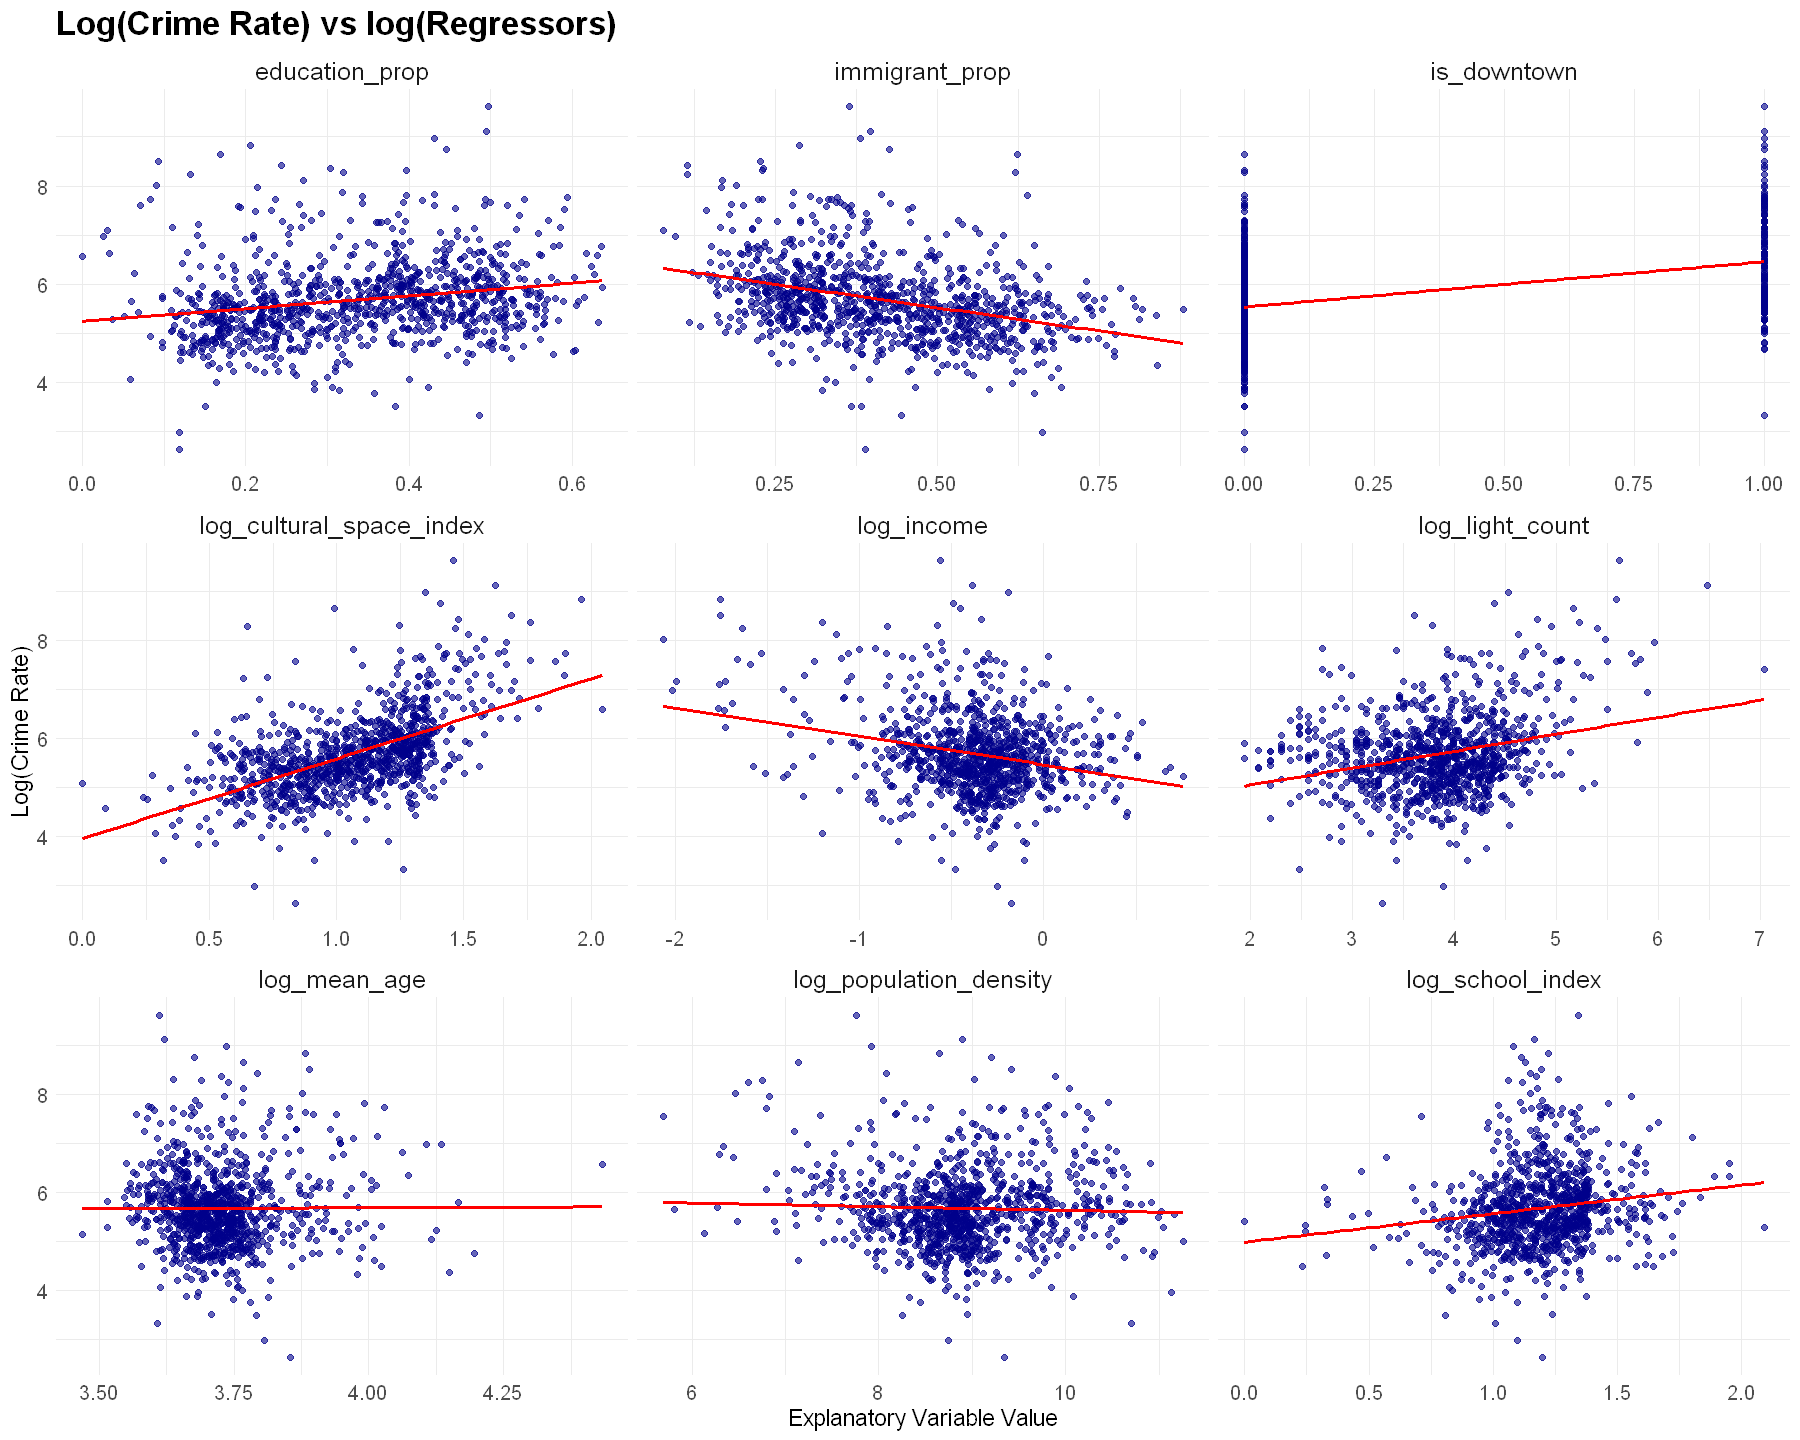

In [36]:
regressors_log <- c('log_light_count', 'log_school_index', 'log_cultural_space_index', 
                'log_income', 'log_population_density', 'log_mean_age','immigrant_prop', 'education_prop','is_downtown')

long_data_log <- census_index_crime_log |>
  pivot_longer(cols = regressors_log,
               names_to = "regressor",
               values_to = "value")

log_log_variables_scatter_log <- ggplot(long_data_log, aes(x = value, y = log_crime_rate)) +
  geom_point(color = "darkblue", alpha = 0.6) +
  facet_wrap(~ regressor, scales = "free_x") + 
  labs(title = "Log(Crime Rate) vs log(Regressors)",
       x = "Explanatory Variable Value",
       y = "Log(Crime Rate)") +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),
        strip.text = element_text(size = 15),  
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12))

log_log_variables_scatter_log

Warning message:
"Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(regressors_inverse)

  # Now:
  data %>% select(all_of(regressors_inverse))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>."
`geom_smooth()` using formula = 'y ~ x'


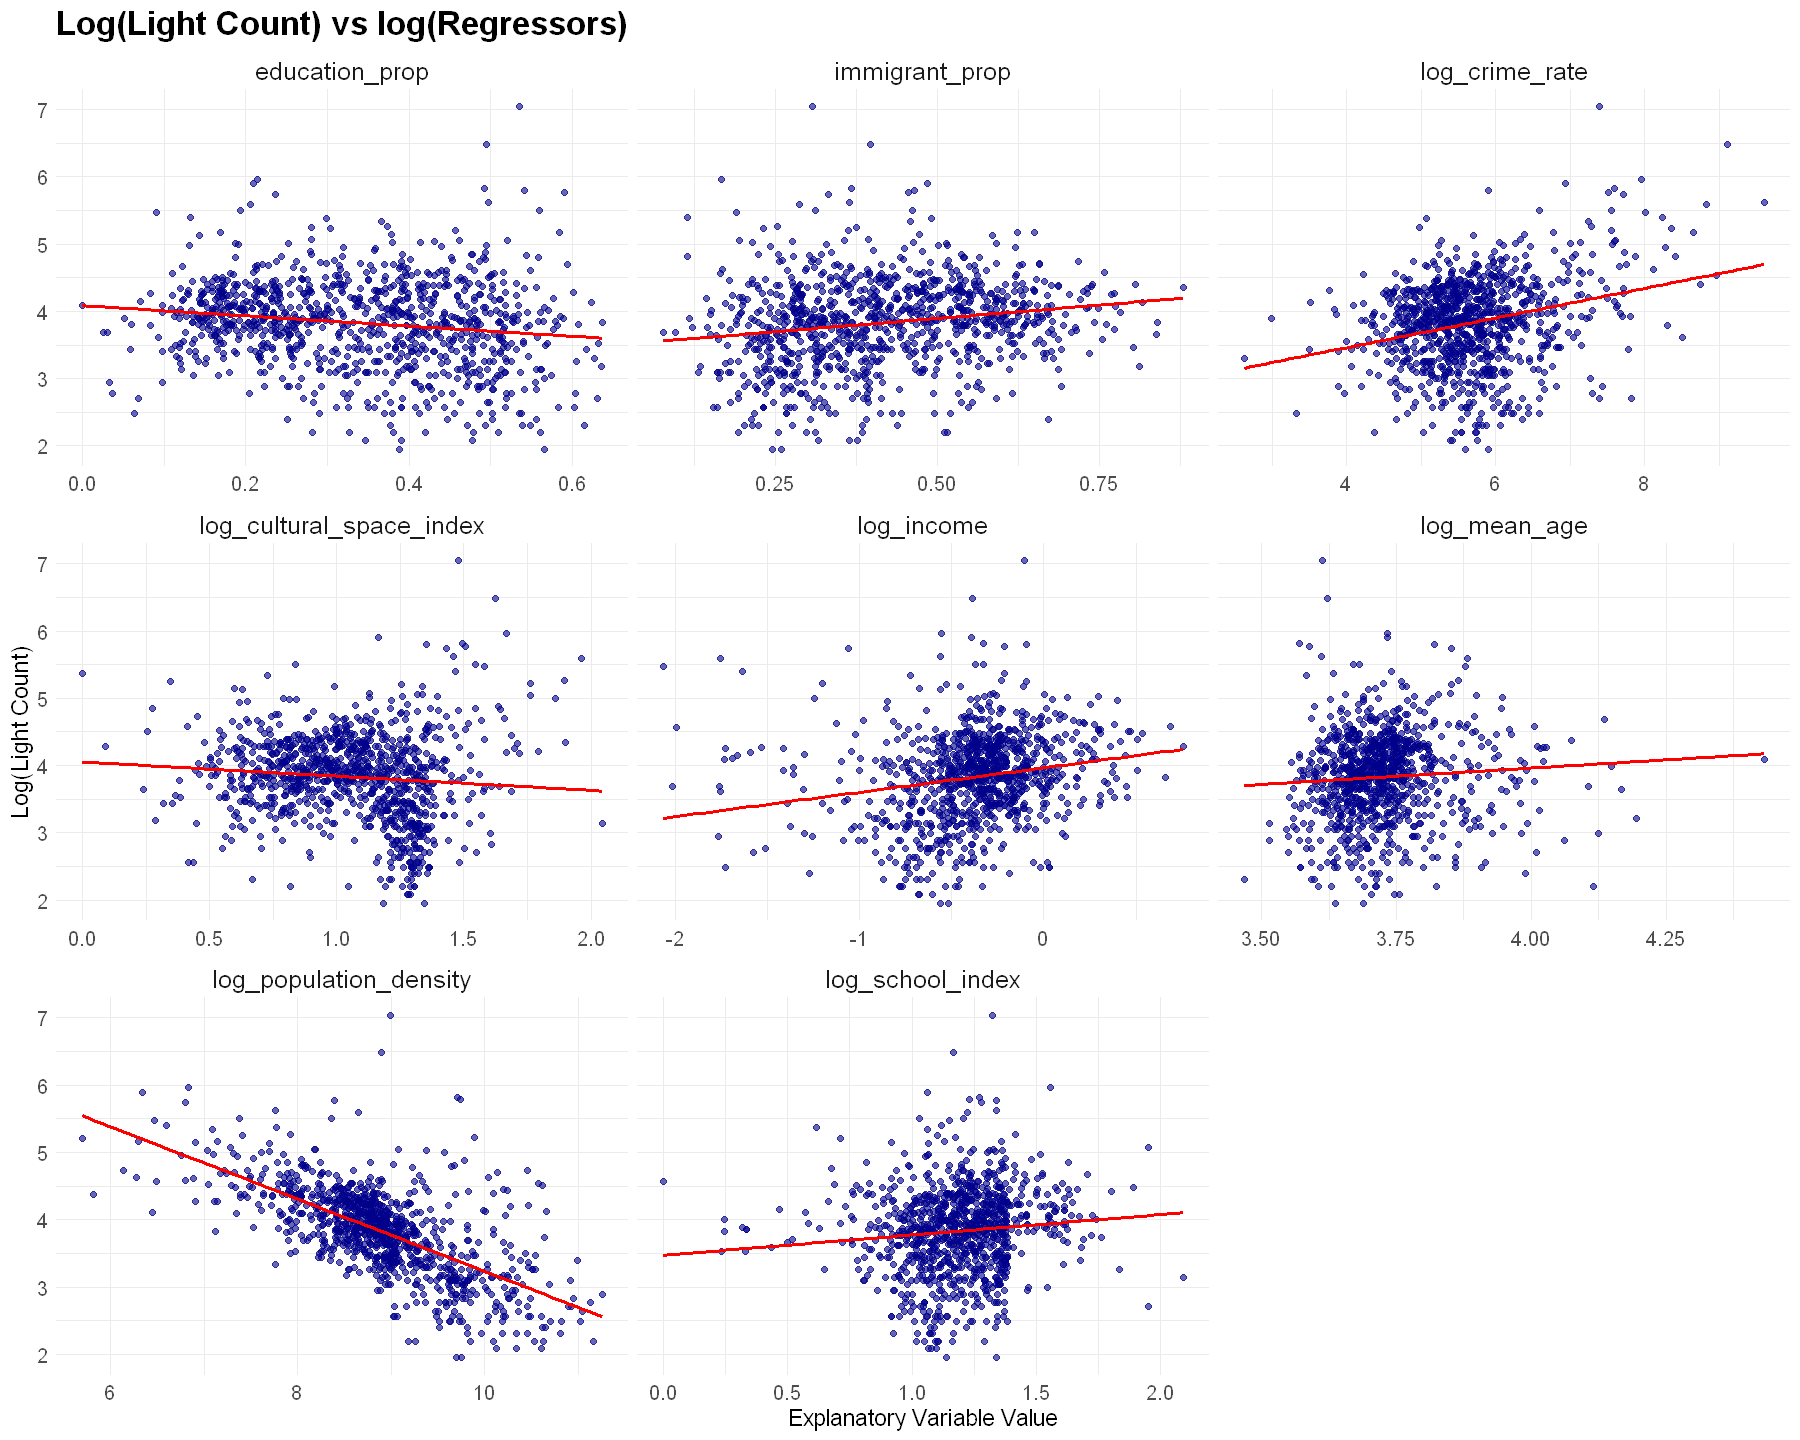

In [37]:
# Inverse model visualization
regressors_inverse <- c('log_crime_rate', 'log_school_index', 'log_cultural_space_index', 
                'log_income', 'log_population_density', 'log_mean_age','immigrant_prop', 'education_prop')

long_data_inverse <- census_index_crime_log |>
  pivot_longer(cols = regressors_inverse,
               names_to = "regressor",
               values_to = "value")

log_log_variables_scatter_inverse <- ggplot(long_data_inverse, aes(x = value, y = log_light_count)) +
  geom_point(color = "darkblue", alpha = 0.6) +
  facet_wrap(~ regressor, scales = "free_x") + 
  labs(title = "Log(Light Count) vs log(Regressors)",
       x = "Explanatory Variable Value",
       y = "Log(Light Count)") +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),
        strip.text = element_text(size = 15),  
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12))

log_log_variables_scatter_inverse


Comparing of regression outputs.

In [38]:
# Waterfall table 1
reg_foot_traffic <- list(reg_log_simple2, reg_log1, reg_log3, reg_log_interaction, reg_log4)

stargazer(reg_foot_traffic, type = "text", 
        title = "Table 1: Log-Log Regression Results with Robust Standard Errors", 
        dep.var.labels = c("Log (Crime Rate)"), 
          covariate.labels = c(
                "Log (Light Count)", 
               "Log (Mean Land Value)",
               "Log (School Index)", 
               "Log (Cultural Space Index)", 
               "Log Income", 
               "Log (Mean Age)",
               "Log (Population Density)",
               "Immigrant Proportion", 
                "Education Proportion",
                "Is Downtown",
                "Is Downtown X Log (Light Count)"),
        se = list(robust_se_simple2, robust_se1, robust_se3, robust_se_interaction, robust_se4),
        single.row = TRUE,
        align=TRUE)


Table 1: Log-Log Regression Results with Robust Standard Errors
                                                                                    Dependent variable:                                                    
                                ---------------------------------------------------------------------------------------------------------------------------
                                                                                     Log (Crime Rate)                                                      
                                          (1)                     (2)                      (3)                      (4)                      (5)           
-----------------------------------------------------------------------------------------------------------------------------------------------------------
Log (Light Count)                  0.345*** (0.048)         0.520*** (0.037)         0.527*** (0.037)         0.486*** (0.038)         0.393*** (0.044)    

In [39]:
# Endogeneity Comparison
stargazer(reg_log5,  reg_log_inverse, type = "text",
          title = "Table 2: Comparing the endogeneity effect",
          covariate.labels = c("Log (Light Count)",
               "Log (Crime Rate)", 
               "Log (School Index)", 
               "Log (Cultural Space Index)", 
               "Log Income",
               "Log (Mean Age)",
               "Log (Population Density)",
               "Immigrant Proportion", 
                "Education Proportion"),
                se = list(robust_se8, robust_se_inverse),
          dep.var.labels = c("Log (Crime Rate)", "Log (Light Count)"),
          single.row = TRUE)


Table 2: Comparing the endogeneity effect
                                       Dependent variable:        
                               -----------------------------------
                               Log (Crime Rate)  Log (Light Count)
                                      (1)               (2)       
------------------------------------------------------------------
Log (Light Count)              0.388*** (0.043)                   
Log (Crime Rate)                                 0.246*** (0.030) 
Log (School Index)             -0.621*** (0.106)   0.103 (0.080)  
Log (Cultural Space Index)     1.660*** (0.112)    0.158 (0.103)  
Log Income                     -0.687*** (0.076)  0.135** (0.061) 
Log (Mean Age)                 -0.583*** (0.224)  -0.029 (0.178)  
Log (Population Density)       -0.215*** (0.043) -0.485*** (0.028)
Immigrant Proportion           -0.355** (0.151)  0.754*** (0.125) 
Education Proportion           0.936*** (0.187)  -0.419*** (0.128)
Constant           

In [40]:
# Waterfall table 3
stargazer(reg_log5, reg_log6,  reg_log7, reg_log8, type = "text", 
        title = "Table 3: Log-Log Regression Results with Robust Standard Errors", 
        dep.var.labels = c("Log (Crime Rate)"), 
          covariate.labels = c(
                "Log (Light Count)", 
               "Log (School Index)", 
               "Log (Cultural Space Index)", 
               "Log Income", 
               "Log (Mean Age)",
               "Log (Population Density)",
               "Immigrant Proportion", 
                "Education Proportion",
                "Is Downtown",
                "Is Downtown X Log (Light Count)"),
        se = list(robust_se5, robust_se6, robust_se7, robust_se8),
        single.row = TRUE,
        align=TRUE)


Table 3: Log-Log Regression Results with Robust Standard Errors
                                                                        Dependent variable:                                         
                                ----------------------------------------------------------------------------------------------------
                                                                          Log (Crime Rate)                                          
                                          (1)                      (2)                       (3)                      (4)           
------------------------------------------------------------------------------------------------------------------------------------
Log (Light Count)                   0.388*** (0.042)         0.345*** (0.041)         0.286*** (0.048)          0.286*** (0.043)    
Log (School Index)                 -0.621*** (0.110)        -0.363*** (0.104)         -0.354*** (0.105)        -0.355*** (0.106)    
Log 

In [41]:
# Comparison between our final model and the downtown-only and non-downtown models
stargazer(reg_log_dt, reg_log_ut,reg_log5, reg_log6, reg_log8, type = "text",
          title = "Table 4: Regression Results by Region with Robust Standard Error in Model 3, 4 and 5",
          column.labels = c("Downtown-Only", "Non-Downtown", "Whole Vancouver", "Whole Vancouver", "Whole Vancouver"),
          covariate.labels = c("Log (Light Count)", 
               "Log (School Index)", 
               "Log (Cultural Space Index)", 
               "Log Income",
               "Log (Mean Age)",
               "Log (Population Density)",
               "Immigrant Proportion", 
                "Education Proportion",
                "Is Downtown",
                "Is Downtown X Log (Light Count)"),
                se = list(NULL, NULL, robust_se5, robust_se6, robust_se8),
          dep.var.labels = c("Log (Crime Rate)", "Log (Crime Rate)"),
          single.row = TRUE)


Table 4: Regression Results by Region with Robust Standard Error in Model 3, 4 and 5
                                                                                   Dependent variable:                                                    
                                --------------------------------------------------------------------------------------------------------------------------
                                                                                     Log (Crime Rate)                                                     
                                     Downtown-Only           Non-Downtown           Whole Vancouver          Whole Vancouver          Whole Vancouver     
                                          (1)                     (2)                     (3)                      (4)                      (5)           
-------------------------------------------------------------------------------------------------------------------------------------------

In [42]:
# Comparison between a linear model and a log-log model
stargazer(reg_linear, reg_log8, type = "text",
          title = "Table 5: Regression Results of Linear and log-log Models",
          covariate.labels = c("Light Count", 
               "School Index", 
               "Cultural Space Index", 
               "Income",
               "Mean Age",
               "Population Density",
               "Log (Light Count)", 
               "Log (School Index)", 
               "Log (Cultural Space Index)", 
               "Log Income",
               "Log (Mean Age)",
               "Log (Population Density)",
               "Immigrant Proportion", 
                "Education Proportion",
                "Is Downtown X Light Count",
                "Is Downtown X Log (Light Count)"),
                se = list(robust_se_linear, robust_se8),
          dep.var.labels = c("Crime Rate", "Log (Crime Rate)"),
          single.row = TRUE)


Table 5: Regression Results of Linear and log-log Models
                                          Dependent variable:          
                                ---------------------------------------
                                     Crime Rate       Log (Crime Rate) 
                                         (1)                 (2)       
-----------------------------------------------------------------------
Light Count                         1.663 (1.261)                      
School Index                    -168.042*** (46.023)                   
Cultural Space Index             387.172*** (83.304)                   
Income                          -459.504*** (111.142)                  
Mean Age                           -4.497 (5.006)                      
Population Density                -0.018*** (0.005)                    
Log (Light Count)                                     0.286*** (0.043) 
Log (School Index)                                    -0.355*** (0.106)
Log (C